# Analysing causes of cancer

### SEN163B - Responsible Data Analytics

Welcome to our code. We are:
- Allegra Melli 6104916, 
- Ann-Kathrin Peitz 6069819, 
- Julian Jahangir 5176379, 
- Jurriaan van Lanschot 4929357, 
- Tim Hol 4487346. 

We hope it contains everything required. If there are any questions please feel free to contact us. Kind regards, group 1.

# 0 - Setting up and importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cancer_df = pd.read_excel('Project_Data/cancer patient data sets.xlsx')
cancer_df_update = pd.read_excel('Project_Data/cancer patient data sets update.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Project_Data/cancer patient data sets update.xlsx'

# 1 - Exploring the Cancer data

In [ ]:
# The imported dataset in a dataframe
cancer_df

In [ ]:
# Exploring all columns
cancer_df.columns

### 1.1 Data Cleaning and Preprocessing

# 2 - Descriptive Analytics

For the descriptive analytics some fundamental lifestyle and demographic characteristics are investigated, which are considered important by literature. Both because these characteristics might serve later as good predictors, but also because these characteristics can be considered as variables that are potentially sensitive to biases. Therefore, it is important to study their prevalence in the dataset, so the potential impacts and later potential relations with other variables can be accounted for.

### 2.1 Age and gender distributions

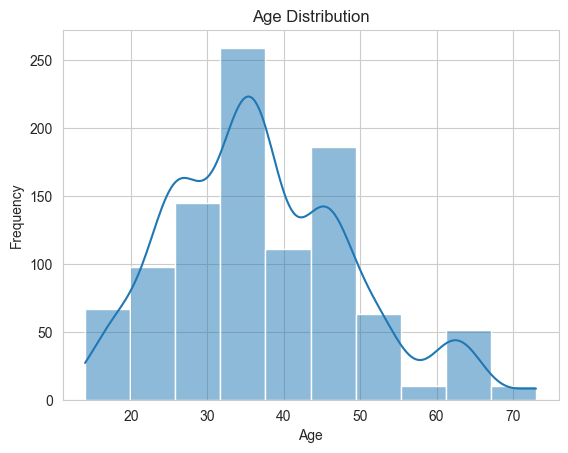

In [2]:
# Observing the age distribution within the dataset
sns.histplot(cancer_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

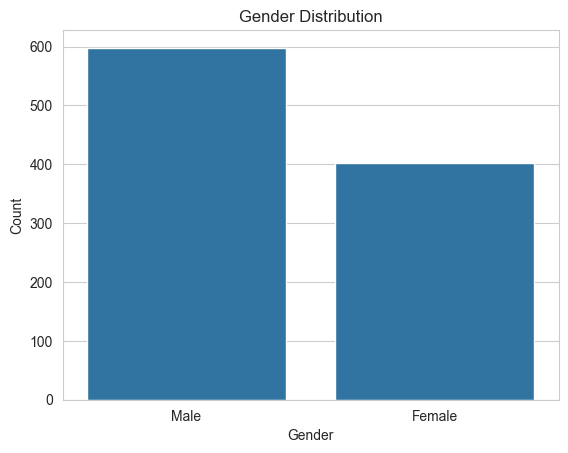

In [3]:
# The Gender distribution of the dataset
sns.countplot(x='Gender', data=cancer_df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

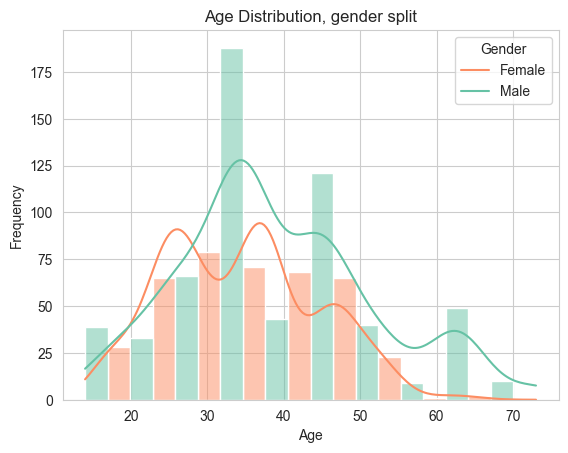

In [4]:
# Observing the age and gender distribution within the dataset
age_gender_plot = sns.histplot(data=cancer_df, x='Age', hue='Gender', multiple='dodge', bins=10, kde=True, palette='Set2')
plt.title('Age Distribution, gender split')
plt.xlabel('Age')
plt.ylabel('Frequency')
age_gender_plot.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

### 2.2 - Disease Severity

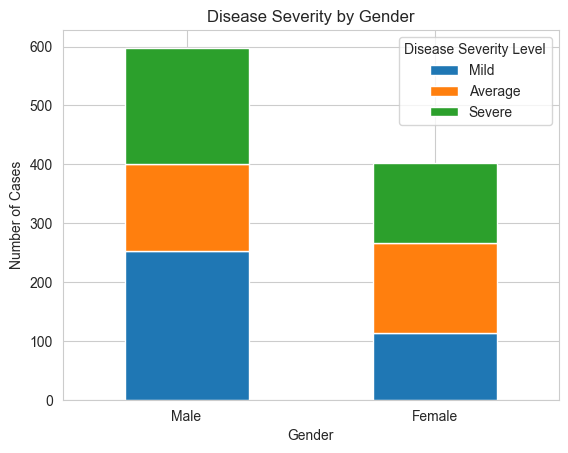

In [5]:
# Amount of cases and their severity vs the gender division
pd.crosstab(cancer_df['Gender'], cancer_df['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])

C:\Users\TimEW\AppData\Local\Temp\ipykernel_13012\294002717.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


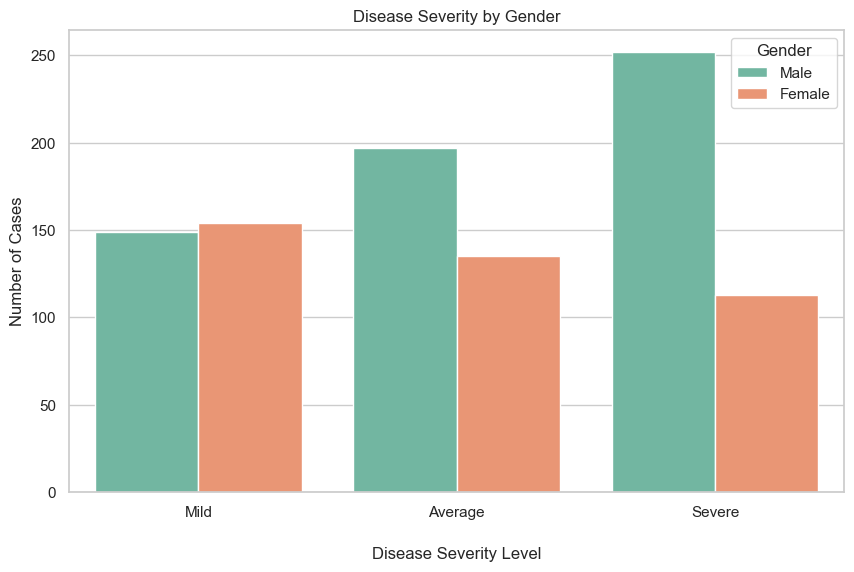

In [6]:
# Level of disease severity by gender, split per level
# Assuming cancer_df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Assuming 'Gender' is the column name for gender
level_gender_plot = sns.countplot(data=cancer_df, x='Level', hue='Gender', palette='Set2')

plt.title('Disease Severity by Gender')
plt.xlabel('Disease Severity Level', labelpad=20)
level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.ylabel('Number of Cases')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_13012\2659166407.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


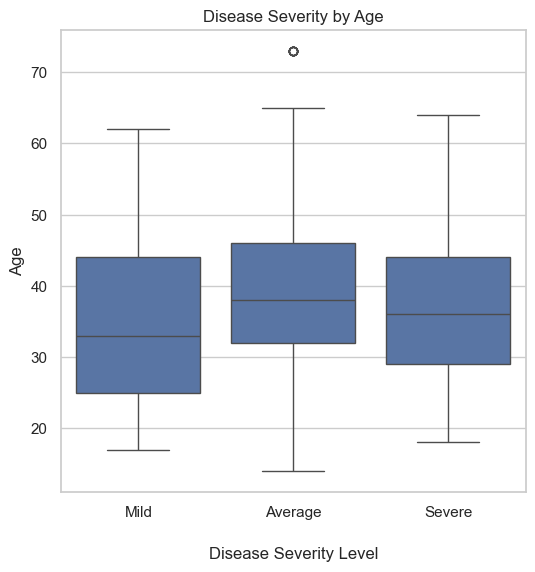

In [7]:
# Disease Severity by age
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

age_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age')
plt.title('Disease Severity by Age')
age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_13012\3331058251.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


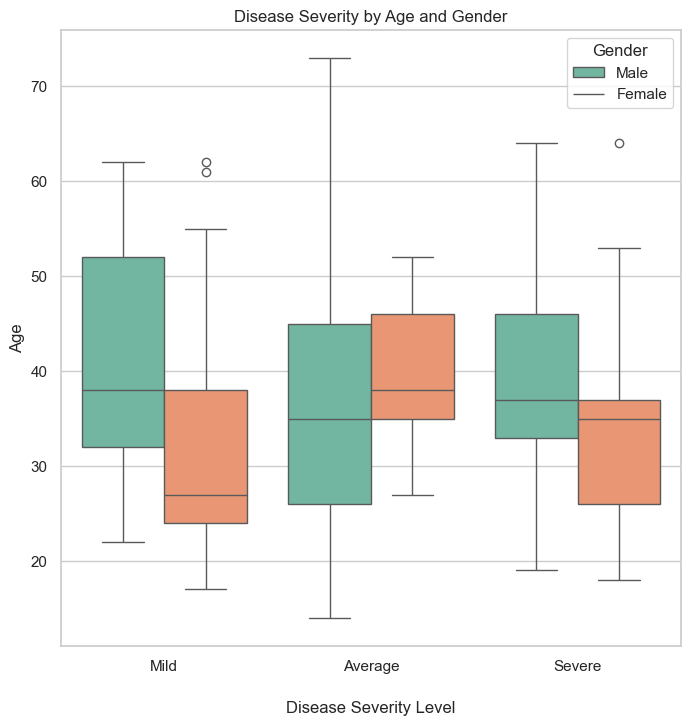

In [8]:
# Disease Severity by gender and age
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

age_gender_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age', hue='Gender', palette='Set2', legend='full')
plt.title('Disease Severity by Age and Gender')
age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
age_gender_level_plot.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

### 2.3 Smoking distributions

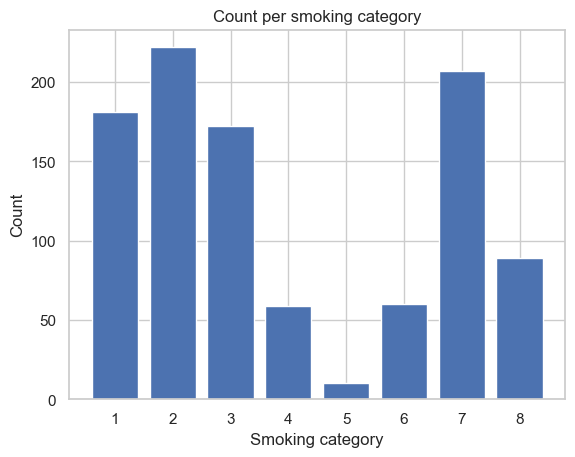

In [9]:
# Count occurrences of each unique value in the 'Smoking' column
smoking_counts = cancer_df['Smoking'].value_counts()

# Plotting
plt.bar(smoking_counts.index, smoking_counts.values)  # Adjust colors if needed
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per smoking category')
plt.show()

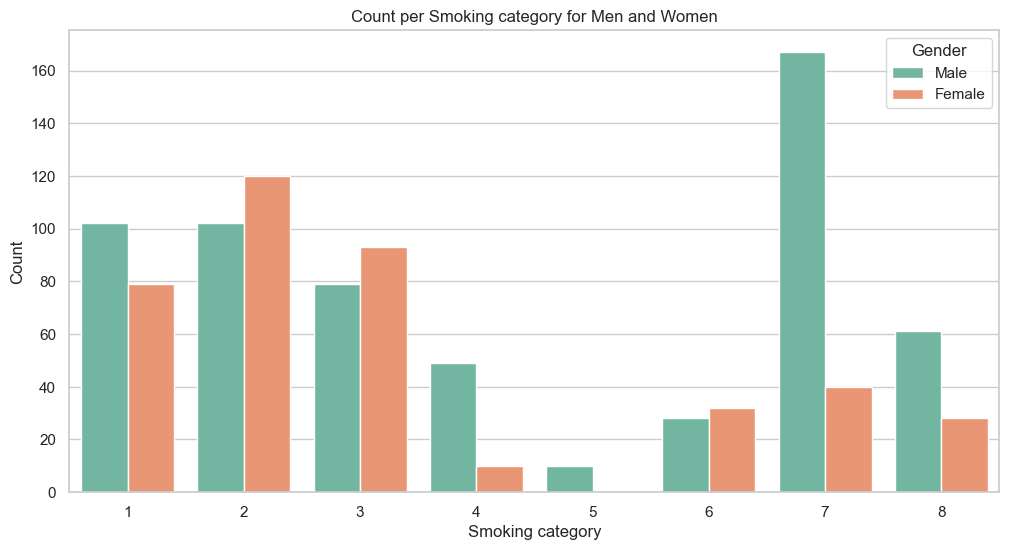

In [10]:
# Smoking category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Smoking', hue='Gender', palette='Set2')

plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per Smoking category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

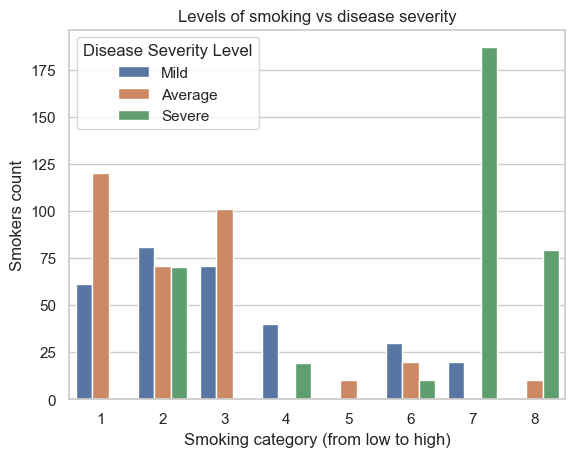

In [11]:
# Smoking level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Smoking', hue = 'Level')
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

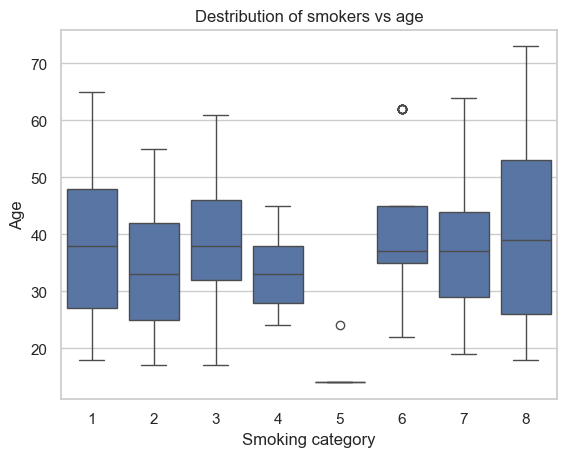

In [12]:
# Smoking level vs age
smoke_age_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age')
plt.title('Distribution of smokers vs age')
plt.xlabel('Smoking category')
plt.show()

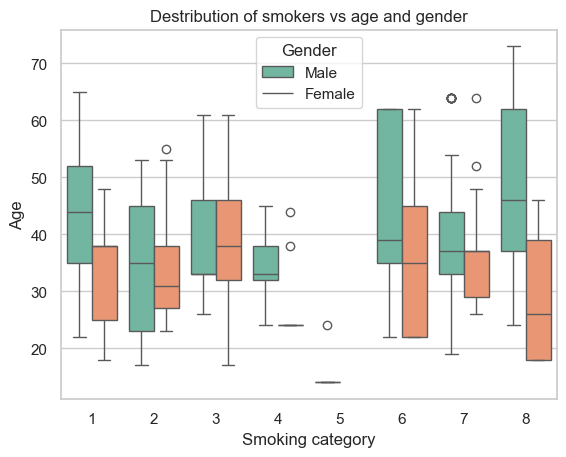

In [13]:
# Smoking level vs age and gender
smoke_age_gender_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of smokers vs age and gender')
plt.xlabel('Smoking category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

### 2.4 Air pollution

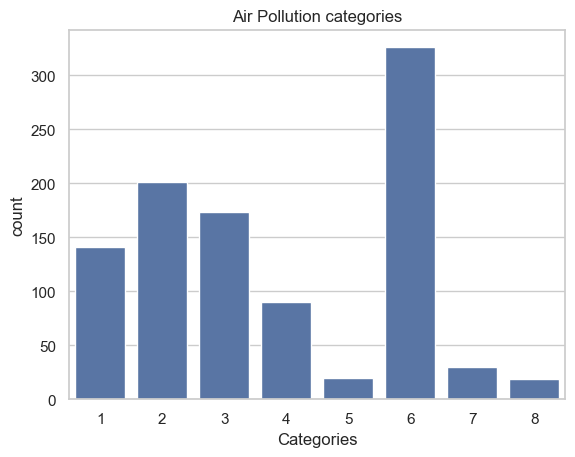

In [14]:
sns.countplot(data=cancer_df, x='Air Pollution')
plt.title('Air Pollution categories')
plt.xlabel('Categories')
plt.show()

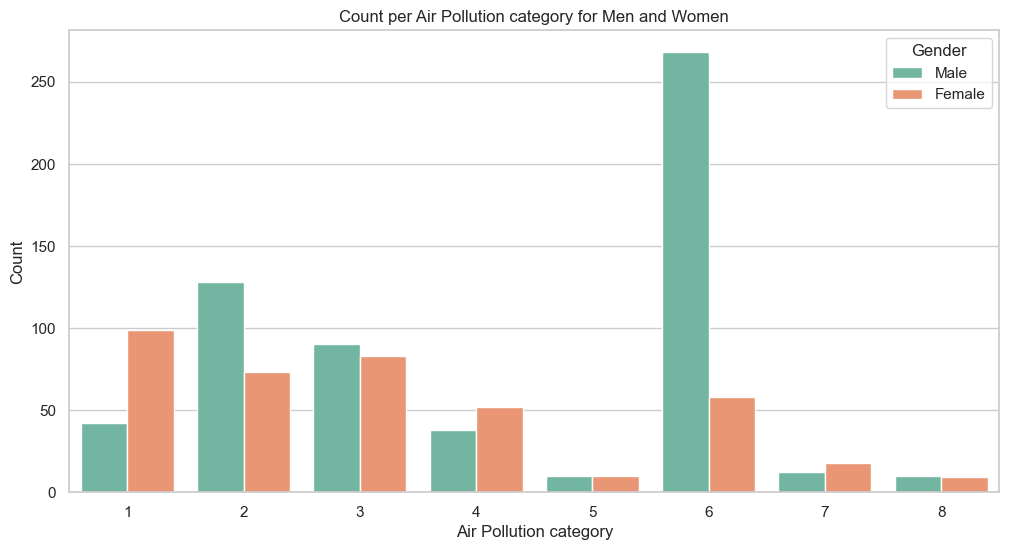

In [15]:
# Air pollution category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Air Pollution', hue='Gender', palette='Set2')

plt.xlabel('Air Pollution category')
plt.ylabel('Count')
plt.title('Count per Air Pollution category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

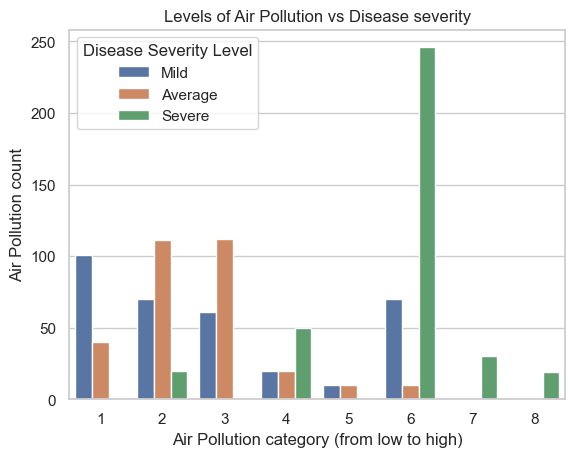

In [16]:
# air pollution level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Air Pollution', hue = 'Level')
plt.title('Levels of Air Pollution vs Disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])
plt.xlabel('Air Pollution category (from low to high)')
plt.ylabel('Air Pollution count')
plt.show()

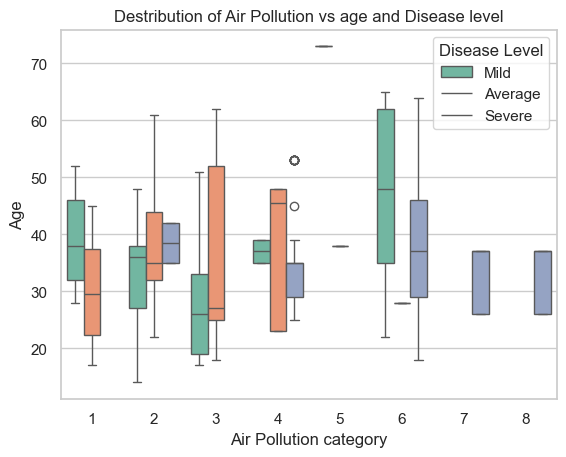

In [17]:
# Air pollution level vs age
air_age_plot = sns.boxplot(data=cancer_df, x='Air Pollution', y='Age', hue='Level', palette='Set2')
plt.title('Distribution of Air Pollution vs age and Disease level')
plt.xlabel('Air Pollution category')
plt.legend(title='Disease Level', labels=['Mild', 'Average', 'Severe'])
plt.show()

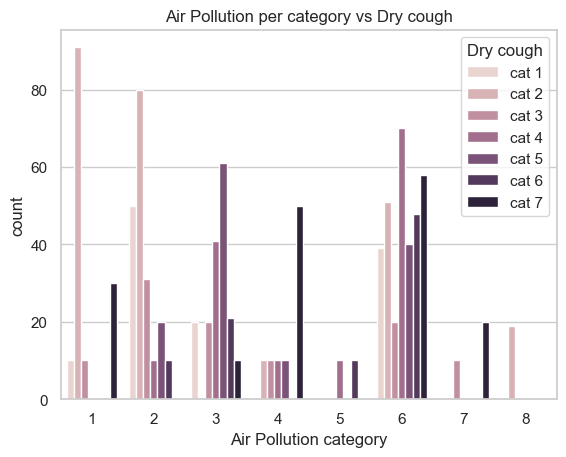

In [18]:
# Air pollution level vs dry cough
air_cough_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='Dry Cough')
plt.title('Air Pollution per category vs Dry cough')
plt.xlabel('Air Pollution category')
plt.legend(title='Dry cough', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

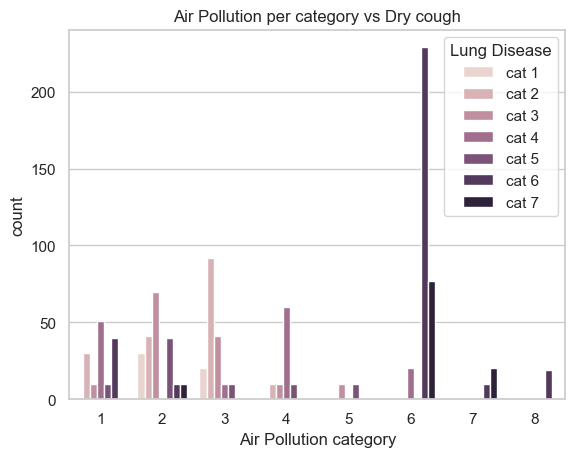

In [19]:
# Air pollution level vs dry cough
air_lung_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='chronic Lung Disease')
plt.title('Air Pollution per category vs Dry cough')
plt.xlabel('Air Pollution category')
plt.legend(title='Lung Disease', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.5 Obesity

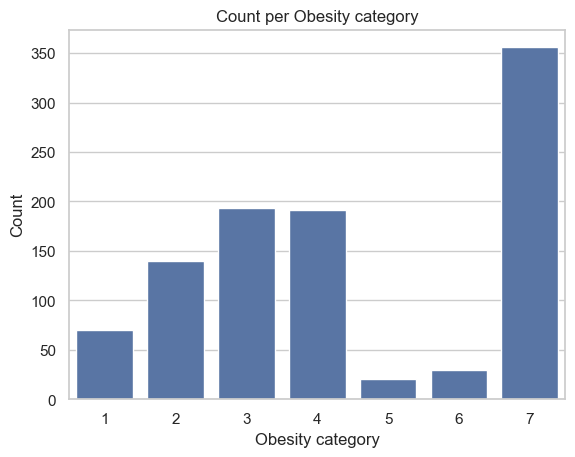

In [20]:
# Count occurrences of each unique value in the 'Smoking' column
obesity_counts = sns.countplot(data=cancer_df, x='Obesity')

# Plotting
plt.xlabel('Obesity category')
plt.ylabel('Count')
plt.title('Count per Obesity category')
plt.show()

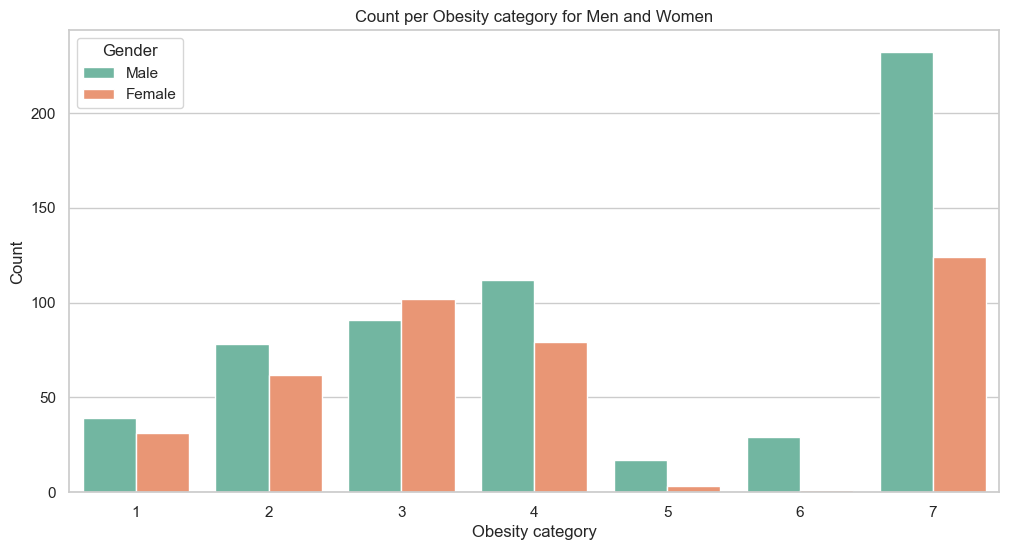

In [21]:
# Obesity category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Obesity', hue='Gender', palette='Set2')

plt.xlabel('Obesity category')
plt.ylabel('Count')
plt.title('Count per Obesity category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

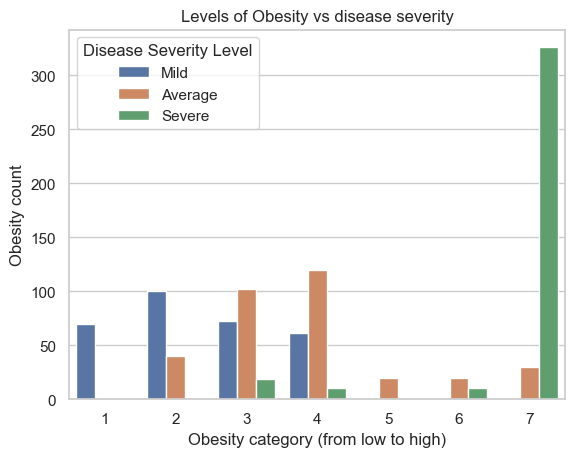

In [22]:
# Obesity level vs Disease Severity
sns.countplot(data=cancer_df, x='Obesity', hue='Level')
plt.title('Levels of Obesity vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Obesity category (from low to high)')
plt.ylabel('Obesity count')
plt.show()

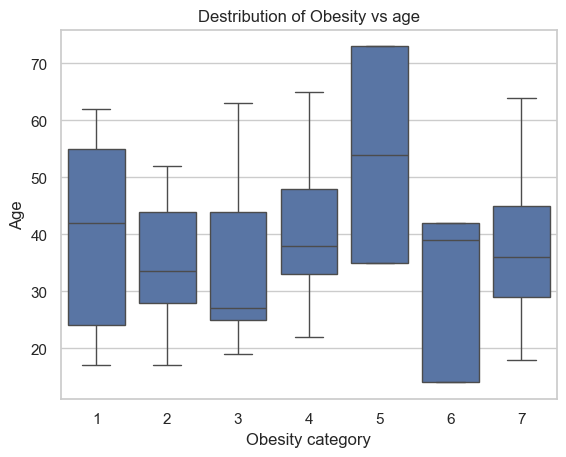

In [23]:
# Obesity level vs age
obesity_age_plot = sns.boxplot(data=cancer_df, x='Obesity', y='Age')
plt.title('Distribution of Obesity vs age')
plt.xlabel('Obesity category')
plt.show()

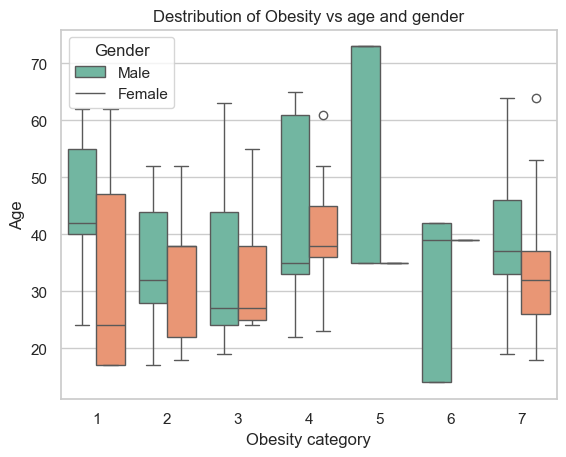

In [24]:
# Obesity level vs age and gender
obesity_age_gender_plot = sns.boxplot(data=cancer_df, x='Obesity', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of Obesity vs age and gender')
plt.xlabel('Obesity category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

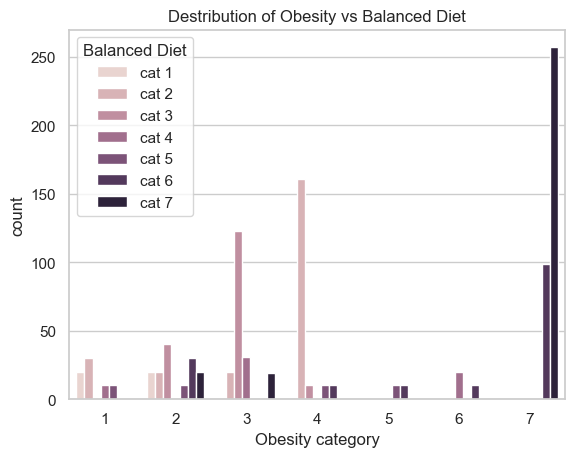

In [25]:
# Obesity level vs balanced diet
obesity_age_diet_plot = sns.countplot(data=cancer_df, x='Obesity', hue='Balanced Diet')
plt.title('Distribution of Obesity vs Balanced Diet')
plt.xlabel('Obesity category')
plt.legend(title='Balanced Diet', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.6 Genetic Risk

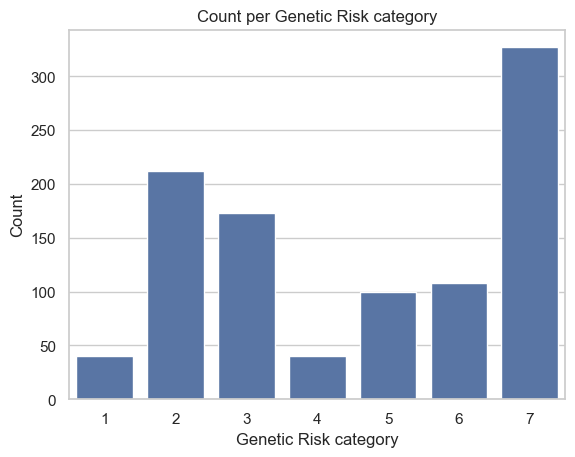

In [26]:
# Count occurrences of each unique value in the Genetic Risk column
genetic_risk_counts = sns.countplot(data=cancer_df, x='Genetic Risk')

# Plotting
plt.xlabel('Genetic Risk category')
plt.ylabel('Count')
plt.title('Count per Genetic Risk category')
plt.show()

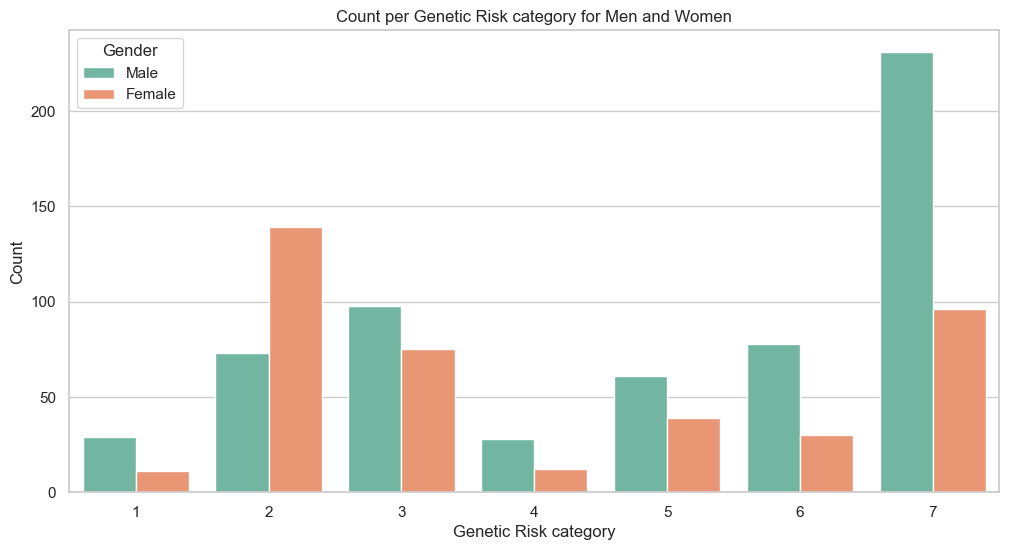

In [27]:
# Genetic Risk category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Genetic Risk and Gender
sns.countplot(data=cancer_df, x='Genetic Risk', hue='Gender', palette='Set2')
plt.xlabel('Genetic Risk category')
plt.ylabel('Count')
plt.title('Count per Genetic Risk category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

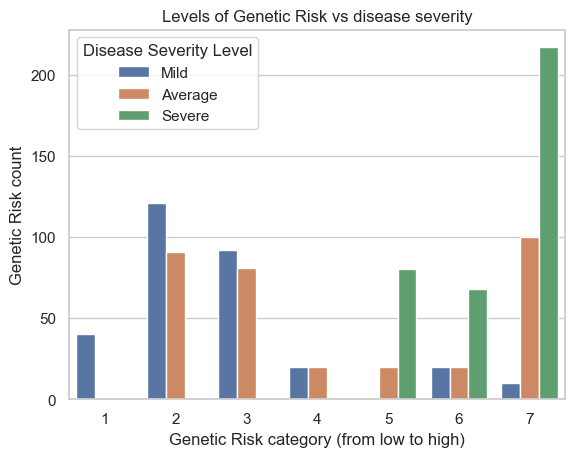

In [28]:
# Genetic Risk level vs Disease Severity
sns.countplot(data=cancer_df, x='Genetic Risk', hue='Level')
plt.title('Levels of Genetic Risk vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Genetic Risk category (from low to high)')
plt.ylabel('Genetic Risk count')
plt.show()

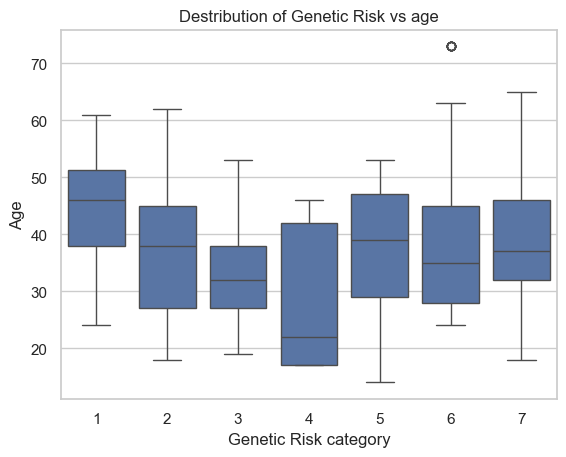

In [29]:
# Genetic Risk level vs age
genetic_risk_age_plot = sns.boxplot(data=cancer_df, x='Genetic Risk', y='Age')
plt.title('Distribution of Genetic Risk vs age')
plt.xlabel('Genetic Risk category')
plt.show()

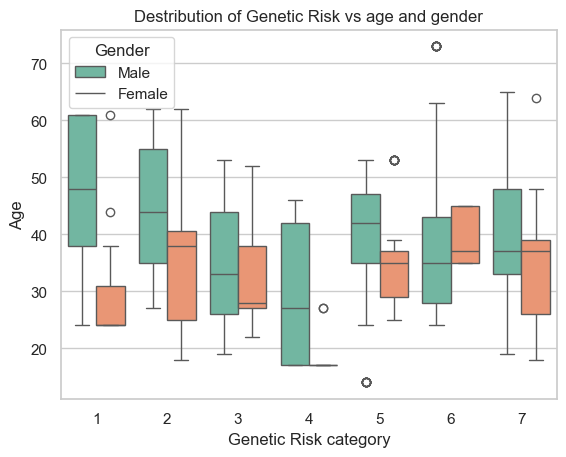

In [30]:
# Genetic Risk level vs age and gender
genetic_risk_age_gender_plot = sns.boxplot(data=cancer_df, x='Genetic Risk', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of Genetic Risk vs age and gender')
plt.xlabel('Genetic Risk category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

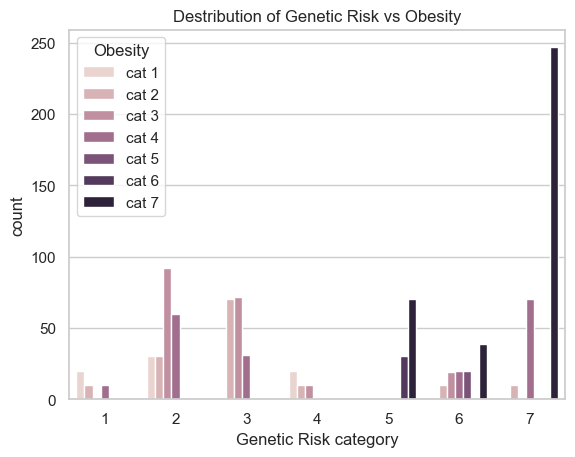

In [31]:
# Genetic Risk level vs balanced diet
genetic_risk_age_diet_plot = sns.countplot(data=cancer_df, x='Genetic Risk', hue='Obesity')
plt.title('Distribution of Genetic Risk vs Obesity')
plt.xlabel('Genetic Risk category')
plt.legend(title='Obesity', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

# Diagnostic Analysis

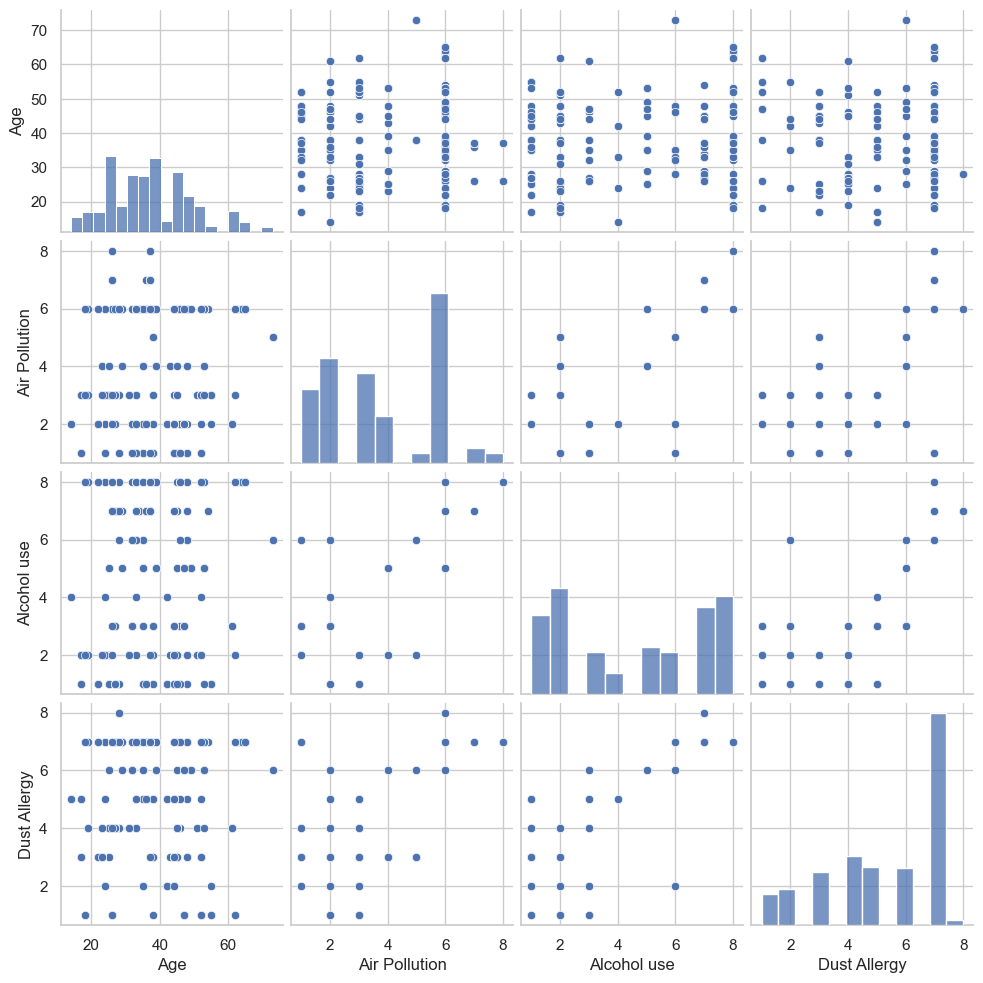

In [32]:
sns.pairplot(cancer_df[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy']])
plt.show()


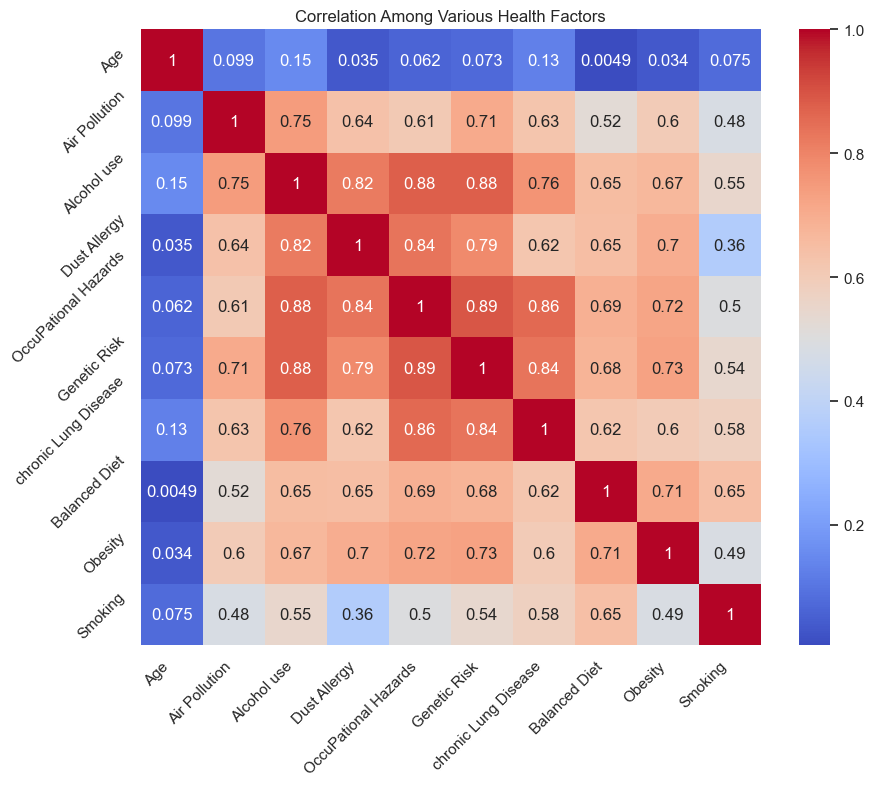

In [33]:

plt.figure(figsize=(10, 8))
corr = cancer_df[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


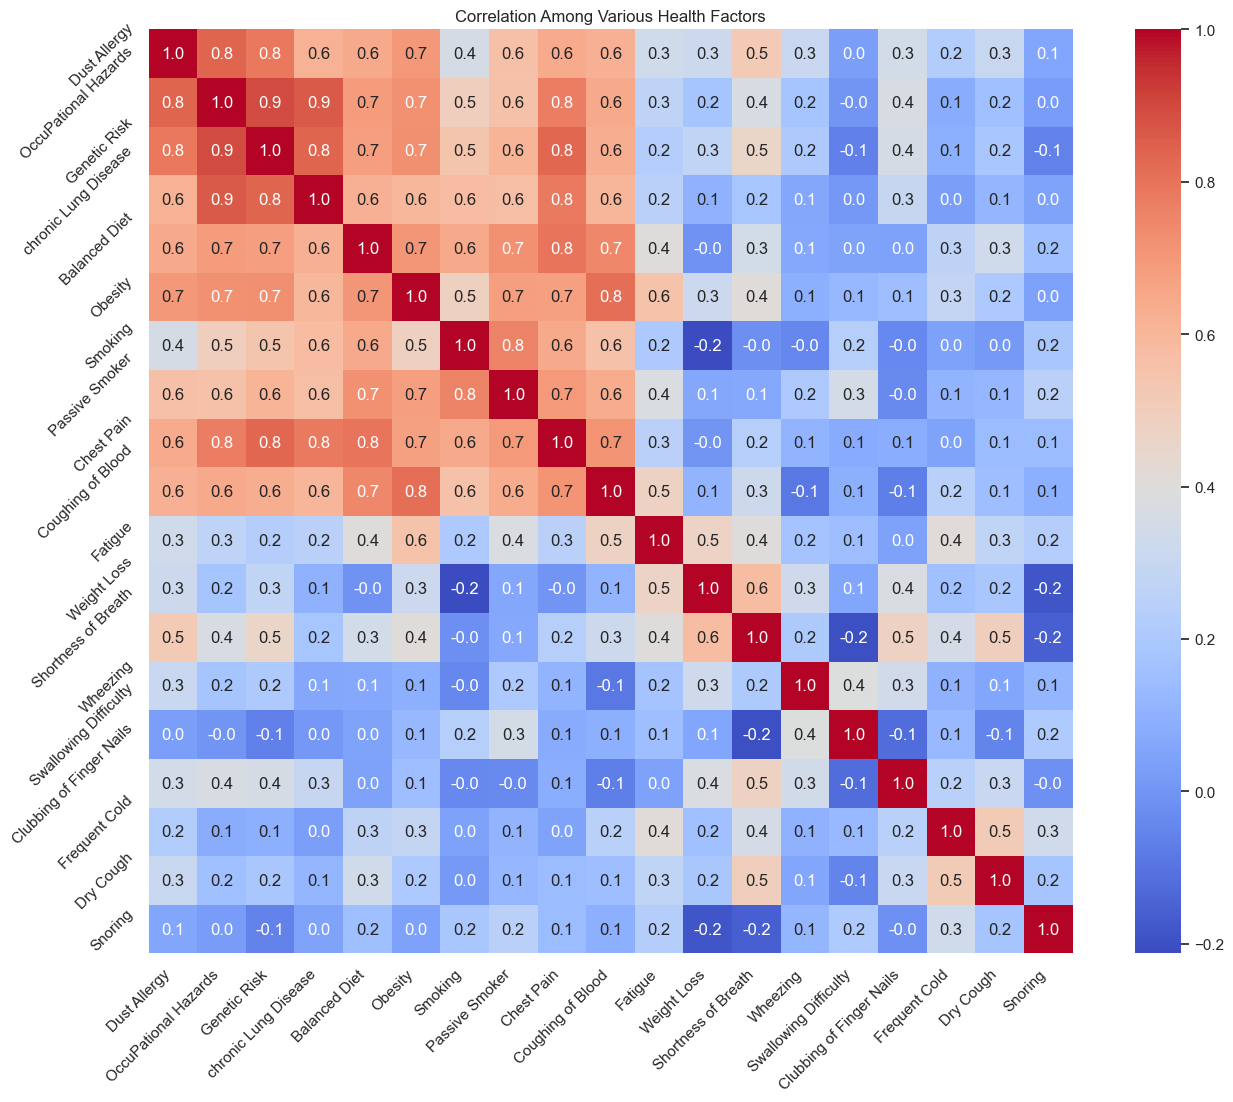

In [34]:

plt.figure(figsize=(16, 12))  # Increased figure size for readability with more variables
corr = cancer_df[['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                   'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
                   'Weight Loss', 'Shortness of Breath', 'Wheezing',
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
                   'Dry Cough', 'Snoring']].corr()  # Selected all listed attributes
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()

In [35]:
corr = cancer_df.corr()  # Computes the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: 'P1'

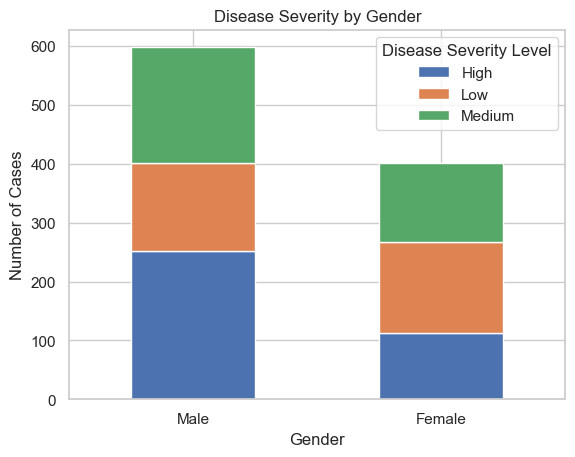

In [36]:
# more tables
pd.crosstab(cancer_df['Gender'], cancer_df['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level')
plt.show()

In [37]:
print(cancer_df.isnull().values.any())

False


In [38]:
print(cancer_df.isnull().sum())

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [39]:
cancer_df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

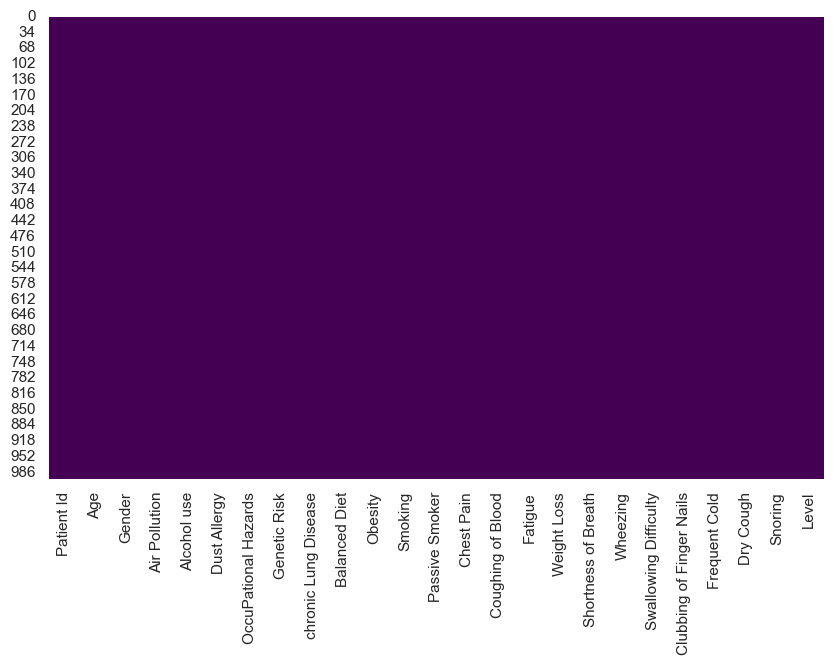

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(cancer_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [41]:
# Assuming cancer_df is your DataFrame
significant_corrs_list = []  # Use a list to collect rows

for col1 in cancer_df.select_dtypes(include=['float64', 'int64', 'int32']).columns:
    for col2 in cancer_df.select_dtypes(include=['float64', 'int64', 'int32']).columns:
        if col1 != col2:
            corr_coef, p_value = pearsonr(cancer_df[col1].dropna(), cancer_df[col2].dropna())
            if p_value < 0.05:  # Adjust your significance level here
                significant_corrs_list.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlation Coefficient': corr_coef,
                    'P-Value': p_value
                })

# Convert the list of dicts to a DataFrame
significant_corrs = pd.DataFrame(significant_corrs_list)

print(significant_corrs.sort_values('P-Value'))

                Variable 1             Variable 2  Correlation Coefficient  \
94    OccuPational Hazards           Genetic Risk                 0.893049   
114           Genetic Risk   OccuPational Hazards                 0.893049   
92    OccuPational Hazards            Alcohol use                 0.878786   
52             Alcohol use   OccuPational Hazards                 0.878786   
112           Genetic Risk            Alcohol use                 0.877210   
..                     ...                    ...                      ...   
216         Passive Smoker    Shortness of Breath                 0.062948   
126           Genetic Risk  Swallowing Difficulty                -0.062948   
340  Swallowing Difficulty           Genetic Risk                -0.062948   
3                      Age   OccuPational Hazards                 0.062177   
89    OccuPational Hazards                    Age                 0.062177   

           P-Value  
94    0.000000e+00  
114   0.000000e+00  


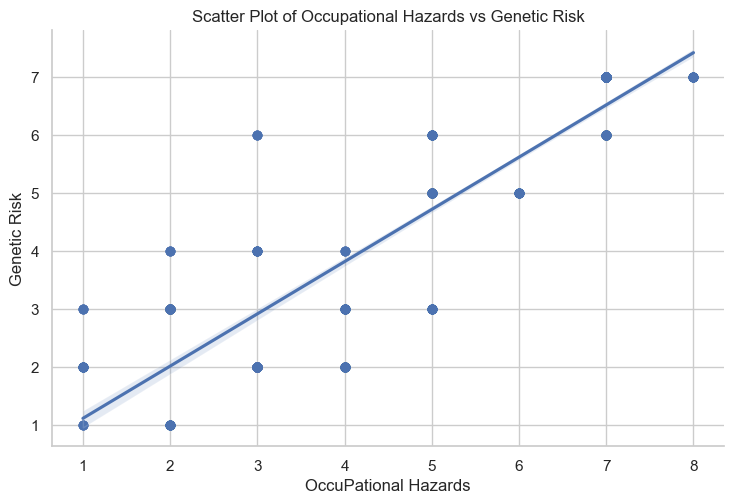

In [42]:
sns.lmplot(x='OccuPational Hazards', y='Genetic Risk', data=cancer_df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

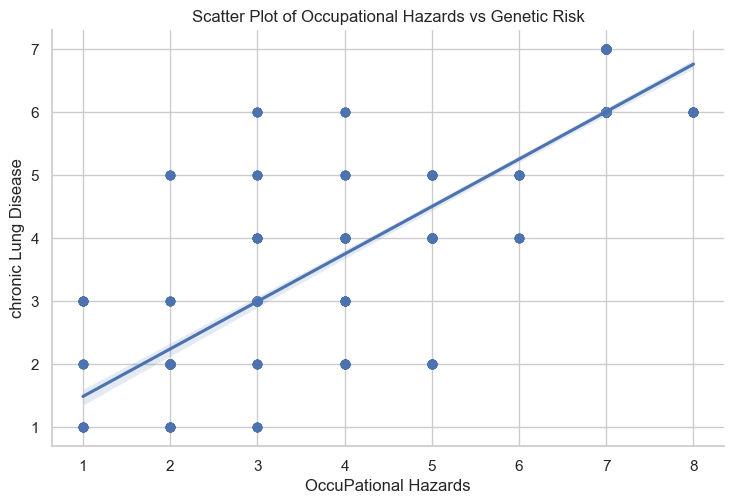

In [43]:
sns.lmplot(x='OccuPational Hazards', y='chronic Lung Disease', data=cancer_df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

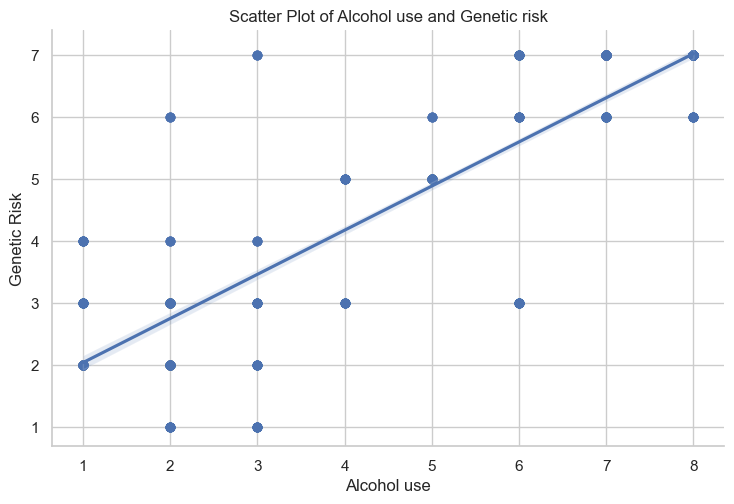

In [44]:
sns.lmplot(x='Alcohol use', y='Genetic Risk', data=cancer_df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Alcohol use and Genetic risk')
plt.show()

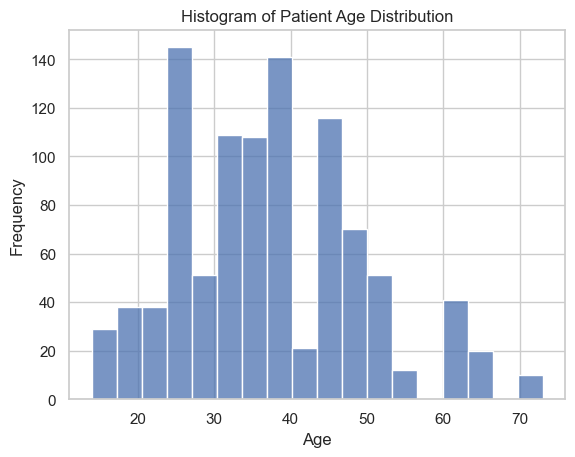

In [45]:
# Assuming 'Age' is your column name
sns.histplot(cancer_df['Age'], kde=False)
plt.title('Histogram of Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Assuming 'PatientID' is the column name for patient IDs in your cancer_df_update DataFrame.
# Exclude the patient ID column and any other non-relevant columns, then calculate the correlation matrix.

# You may need to adjust this if your DataFrame has different column names for patient IDs or other identifiers.
numeric_data = cancer_df_update.drop(['Patient Id'], axis=1, errors='ignore')

# Calculate the correlation matrix on the numeric data only
corr = numeric_data.corr()

# Now you can plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Health Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()  # This will adjust the layout to prevent cutting off the edges
plt.show()

NameError: name 'cancer_df_update' is not defined

In [47]:
# Let's assume 'Obesity' is significantly correlated with 'Level'
sns.barplot(x='Level', y='Obesity', data=cancer_df_update, estimator=np.mean, ci=None)
plt.title('Average Obesity by Disease Level')
plt.show()

NameError: name 'cancer_df_update' is not defined

In [48]:
# If 'Genetic Risk' shows a strong correlation with 'Level'
sns.regplot(x='Level', y='Genetic Risk', data=cancer_df_update, fit_reg=True)
plt.title('Genetic Risk by Disease Level')
plt.show()

NameError: name 'cancer_df_update' is not defined

In [49]:
# Example: Violin plot for 'Genetic Risk' by 'Level'
sns.violinplot(x='Level', y='Genetic Risk', data=cancer_df_update)
plt.title('Genetic Risk Distribution Across Disease Levels')
plt.show()

NameError: name 'cancer_df_update' is not defined

In [50]:
# Example: Scatter plot for 'Fatigue' and 'Weight Loss' with hue by 'Level'
sns.scatterplot(x='Obesity', y='Genetic Risk', hue='Level', data=cancer_df_update)
plt.title('Relationship Between Fatigue and Weight Loss Across Disease Levels')
plt.show()

NameError: name 'cancer_df_update' is not defined

In [51]:
# Example: Pair plot for a subset of health factors
subset = cancer_df_Update[['chronic Lung Disease', 'Obesity', 'Smoking', 'Level']]
sns.pairplot(subset, hue='Level')
plt.show()

NameError: name 'cancer_df_Update' is not defined

#### Here the predictive analytics start
Once the problem you want to tackle has been assessed and refined, you can proceed with the predictive analytics part. As a reminder, the main goal of predictive analytics is to build a predictive model in order to be able to make predictions on unseen data, based on the informative content of the existing data.
Required activities
- Identify the target variable y for the predictive problem at hand
- Analyze the distribution of the target variable y: Is it balanced or unbalanced?
- Split the available data into a training-testing-validation set.
o The training set will be used to train the predictive model.
o The testing set will be used to assess the model performance.
o The validation set is a subset of data which will be set aside (unseen from the
model) and used to simulate the future data that the model will need to predict.
- According to the defined problem (regression/binary classification/multiclass classification)
o Select at least two different appropriate performance metrics
o Assess one baseline model and at least three different supervised predictive
models using the aforementioned performance metric
- (Optionally) Employ unsupervised techniques to further extract insights from the data
- Critically discuss the modeling choices and the outcomes of the previous steps.
Note: Please note that developing a prototype is, by definition, an iterative process, so don’t be afraid to
go back to problem definition and adjust it as you gain a better understanding of the problem at hand.

In [52]:
# Step 1: Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Step 5: Model selection and training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Predictions
# Use the trained model to make predictions on new data

# Example new data (replace this with your own new data)
new_data = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'Air Pollution': [3],
    'Alcohol use': [2],
    'Dust Allergy': [4],
    'OccuPational Hazards': [5],
    'Genetic Risk': [6],
    'chronic Lung Disease': [3],
    'Balanced Diet': [7],
    'Obesity': [4],
    'Smoking': [6],
    'Passive Smoker': [2],
    'Chest Pain': [1],
    'Coughing of Blood': [1],
    'Fatigue': [2],
    'Weight Loss': [1],
    'Shortness of Breath': [3],
    'Wheezing': [2],
    'Swallowing Difficulty': [1],
    'Clubbing of Finger Nails': [1],
    'Frequent Cold': [2],
    'Dry Cough': [1],
    'Snoring': [3]
})

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print("Predicted cancer levels for new data:", predictions)

Accuracy: 1.0
Predicted cancer levels for new data: ['Low']
